<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Dayana Navarro Valencia y Juan Pablo Ruiz Magaña.

**Fecha:** 27 de Abril 2021:

**Expediente** : 721470 y 721093
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link del Repositorio**:https://github.com/JuanPablo2019/Tarea9.git

# Tarea 9:  Clase 22

## Enunciado de tarea 
# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

### `Respuesta de Dayana`

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline


### `Elección del activo:` _Mc´Donalds_

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

### PRECIOS DE CIERRE

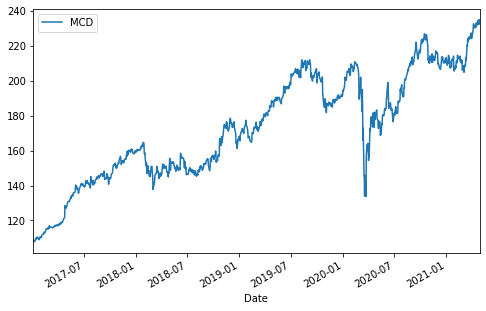

In [3]:
ticker = ['MCD']
start_date = '2017-01-01'

closes_mc = get_adj_closes(ticker, start_date)
closes_mc.plot(figsize=(8,5));
plt.legend(ticker);

### PRECIOS CIERRE LOGARITMICOS

In [4]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

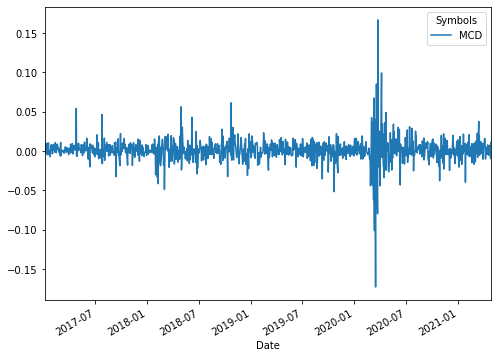

In [5]:
ret_mc = calc_daily_ret(closes_mc)
ret_mc.plot(figsize=(8,6));

## INFORMACIÓN OPCIONES 

In [6]:
mc = web.YahooOptions('MCD')
mc_opt = mc.get_all_data().reset_index()
mc_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,,,,,,,,,,,,
2021-04-30,212.5,call,MCD210430C00212500,21.23,20.50,21.05,-1.540001,-6.763289,20.0,404.0,0.671878,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-28 17:07:20,"{'contractSymbol': 'MCD210430C00212500', 'stri..."
2021-04-30,180.0,put,MCD210430P00180000,0.04,0.00,0.29,0.000000,0.000000,3.0,9.0,1.332035,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-21 17:09:44,"{'contractSymbol': 'MCD210430P00180000', 'stri..."
2021-04-30,252.5,call,MCD210430C00252500,0.12,0.11,0.13,-0.020000,-14.285716,65.0,121.0,0.480474,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-28 18:39:54,"{'contractSymbol': 'MCD210430C00252500', 'stri..."
2021-04-30,227.5,put,MCD210430P00227500,0.86,0.82,0.91,0.210000,32.307700,486.0,877.0,0.338874,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-28 19:02:40,"{'contractSymbol': 'MCD210430P00227500', 'stri..."
2021-04-30,255.0,call,MCD210430C00255000,0.09,0.07,0.09,-0.020000,-18.181814,50.0,75.0,0.497075,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-28 17:45:47,"{'contractSymbol': 'MCD210430C00255000', 'stri..."
2021-04-30,227.5,call,MCD210430C00227500,6.45,6.40,6.75,-2.000000,-23.668640,12.0,618.0,0.408941,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-28 18:33:54,"{'contractSymbol': 'MCD210430C00227500', 'stri..."
2021-04-30,185.0,put,MCD210430P00185000,0.01,0.00,0.31,0.000000,0.000000,10.0,21.0,1.218754,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-27 16:06:39,"{'contractSymbol': 'MCD210430P00185000', 'stri..."
2021-04-30,180.0,call,MCD210430C00180000,52.29,52.85,53.50,0.000000,0.000000,4.0,4.0,1.486331,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-26 19:53:43,"{'contractSymbol': 'MCD210430C00180000', 'stri..."
2021-04-30,225.0,put,MCD210430P00225000,0.49,0.49,0.52,0.080000,19.512197,576.0,3279.0,0.351569,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-28 19:06:14,"{'contractSymbol': 'MCD210430P00225000', 'stri..."


In [7]:
K = 250 # strike price
indice_opt = mc_opt.loc[(mc_opt.Type=='put') & (mc_opt.Strike==K) & (mc_opt.Expiry=='2021-06-18')]
indice_opt

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
495,250.0,2021-06-18,put,MCD210618P00250000,18.05,18.9,19.4,-0.690001,-3.681967,4.0,85.0,0.223824,MCD,False,MCD,232.88,2021-04-28 19:24:37,2021-04-26 14:13:18,"{'contractSymbol': 'MCD210618P00250000', 'stri..."


In [8]:
i_opt= indice_opt.index
opcion_valuar = mc_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'MCD210618P00250000',
 'strike': 250.0,
 'currency': 'USD',
 'lastPrice': 18.05,
 'change': -0.69000053,
 'percentChange': -3.6819665,
 'volume': 4,
 'openInterest': 85,
 'bid': 18.9,
 'ask': 19.4,
 'contractSize': 'REGULAR',
 'expiration': 1623974400,
 'lastTradeDate': 1619446398,
 'impliedVolatility': 0.22382367980957027,
 'inTheMoney': True}

In [9]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  232.88


### RENDIMIENTO SIMPLE

In [11]:
# Obtenemos el rendimiento simple
Ri = closes_mc.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri.head()

Symbols,MCD
Date,
2017-01-04,-0.001170
2017-01-05,0.001841
2017-01-06,0.008855
2017-01-09,-0.002733
2017-01-10,-0.001495


In [12]:
opcion_valuar.Expiry

Timestamp('2021-06-18 00:00:00')

In [13]:
from datetime import date

# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())


# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

nscen = 10000

# Generar rangos de fechas de días hábiles
dates =pd.date_range(today, expiry, freq='B')
ndays =len(dates)



In [15]:
# Simular los rendimientos
# Rendimiento diario 
dt = 1
Z = np.random.randn(ndays, nscen)

# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(Z*sigma_R*np.sqrt(dt)
                     +mu_R*dt, index=dates)


Ri_dt.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-04-28,-0.013607,0.003059,-0.006064,0.013668,0.017867,-0.012169,0.004792,-0.006024,-0.006512,0.029810,...,0.024700,-0.025303,0.015211,0.003643,0.017609,-0.006286,0.025815,0.003116,-0.005241,0.009424
2021-04-29,0.007578,0.016146,-0.019225,-0.006454,0.004282,0.011004,0.019413,-0.011235,0.003698,0.014589,...,0.021266,-0.006560,0.032038,-0.024160,-0.020321,0.022994,0.022617,0.009509,0.024041,0.018395
2021-04-30,-0.039867,-0.005294,0.022749,-0.017621,0.011080,-0.030594,0.015682,-0.006509,-0.002530,0.030247,...,-0.000073,-0.009167,0.004685,0.028705,-0.058127,0.005750,0.016473,-0.004664,0.026258,-0.033979
2021-05-03,0.014288,0.014141,0.020457,0.021049,-0.014190,0.007505,0.004268,0.004149,0.031564,-0.005925,...,-0.015420,0.001219,-0.010972,-0.012647,-0.001433,-0.007105,-0.010380,0.005513,-0.009178,0.015971
2021-05-04,0.004560,-0.006851,0.021978,0.011300,0.000974,-0.010829,0.026439,0.006922,-0.035274,0.022277,...,-0.005300,0.002111,0.016231,-0.002002,0.001266,0.004188,-0.034662,-0.010941,-0.003760,-0.000813


In [19]:
S0= opcion_valuar.Underlying_Price

#np.prod(Ri_dt)

S_T= S0*(Ri_dt + 1).cumprod()

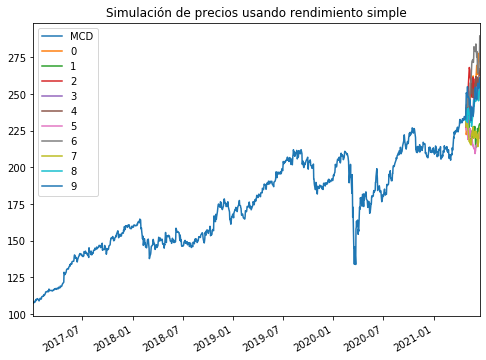

In [17]:
# Simulación del precio
S_0 = closes_mc.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()
S_T.iloc[0,:]=S_0

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_mc, S_T.iloc[:, :10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

### RENDIMIENTOS LOGARITMICOS

In [20]:
# Calcular rendimiento logarítmico
ri = calc_daily_ret(closes_mc)

# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# Simulación del rendimiento
Z = np.random.randn(ndays, nscen)
sim_ret_ri = pd.DataFrame(mu_r * dt + Z * sigma_r * np.sqrt(dt), index=dates )

# Simulación del precio
S_0 = closes_mc.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

17.010417783755063

In [21]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.015243748694562288, 0.01523004038358405)

Con los precios simulados debemos de encontrar el valor de la opción según la función de pago correspondiente. Para este caso es:
$$
P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}
$$

## Valuación usando el modelo de Black and Scholes

In [24]:
mu = ret_mc.mean()[0]
sigma = ret_mc.std()[0]
mu, sigma

(0.0007104786606750783, 0.01523004038358405)

In [25]:
# Tasa de bonos de 1 yr de fecha 11/23/20 -> 0.10%
r = 0.0016/360

In [26]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry



#ndays = (expiry - today).days
ndays = len(dates)
nscen = 10
dates = pd.date_range(start=today, periods = ndays)
dates

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07', '2021-05-08', '2021-05-09',
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-15', '2021-05-16', '2021-05-17',
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
               '2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02',
               '2021-06-03', '2021-06-04'],
              dtype='datetime64[ns]', freq='D')

In [27]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()

,0,1,2,3,4,5,6,7,8,9
2021-04-28,0.011778,-0.007464,-0.011947,0.025876,-0.002432,0.002714,-0.001413,-0.003938,0.004280,0.012050
2021-04-29,0.010477,-0.011896,-0.006923,0.026915,-0.011475,0.001294,0.020442,-0.014168,0.024928,0.012894
2021-04-30,-0.003119,-0.034087,-0.001416,0.005095,-0.017906,0.009952,0.025240,0.003991,0.020786,0.010585
2021-05-01,-0.004393,-0.060571,0.004127,-0.003656,-0.003733,0.003631,0.017130,0.008723,-0.001779,-0.003527
2021-05-02,0.010242,-0.051031,0.003670,-0.009622,0.009151,0.029497,0.008861,0.002581,-0.008273,-0.007994
2021-05-03,-0.000313,-0.044587,-0.010297,-0.006999,-0.008380,0.031147,0.003797,-0.003485,0.003340,-0.000941
2021-05-04,0.010177,-0.039101,-0.025462,-0.017113,-0.005728,0.032856,-0.007340,-0.008518,-0.001118,0.009770
2021-05-05,0.023353,-0.071069,-0.024616,-0.024387,-0.020599,0.031977,0.001398,0.003933,0.014177,-0.007050
2021-05-06,0.025758,-0.096336,-0.013990,-0.015638,-0.063848,0.036474,0.004320,0.012330,0.033059,-0.024618
2021-05-07,0.024128,-0.108984,-0.009802,-0.002637,-0.080555,0.056516,-0.014942,0.006254,0.026037,-0.040409


In [28]:
S0 = closes_mc.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[-1,0]
sim_closes

,0,1,2,3,4,5,6,7,8,9
2021-04-28,235.709856,231.217645,230.183505,239.056585,232.384103,233.583073,232.621063,232.034401,233.949110,235.774034
2021-04-29,235.403348,230.195268,231.342789,239.305055,230.292098,233.251603,237.761004,229.672845,238.829960,235.973081
2021-04-30,232.224530,225.143308,232.620288,234.139826,228.815952,235.280000,238.904479,233.881493,237.842774,235.428760
2021-05-01,231.928929,219.258816,233.913299,232.099997,232.082001,233.797285,236.974811,234.990997,232.535939,232.129756
2021-05-02,235.348152,221.360527,233.806547,230.719267,235.091582,239.923670,235.023278,233.551912,231.030715,231.095126
2021-05-03,232.877122,222.791696,230.563575,231.325225,231.006032,240.319767,233.836147,232.139509,233.729304,232.730910
2021-05-04,235.332871,224.017110,227.093601,228.997521,231.619469,240.731007,231.246503,230.974043,232.689773,235.236976
2021-05-05,238.454146,216.969153,227.285750,227.337857,228.200534,240.519389,233.276000,233.867954,236.276040,231.313504
2021-05-06,239.028220,211.555676,229.713822,229.335561,218.541483,241.603508,233.958441,235.840080,240.779688,227.285331
2021-05-07,238.639064,208.896661,230.677777,232.336481,214.920634,246.494425,229.495176,234.411327,239.094928,223.724411


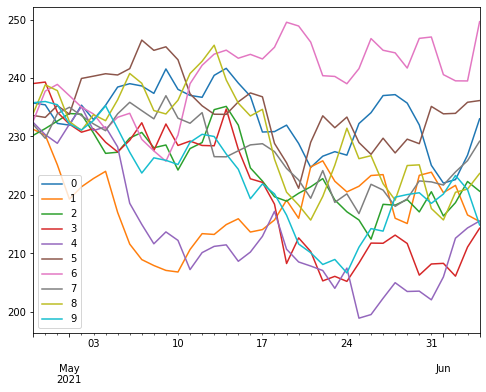

In [29]:
sim_closes.plot(figsize=(8,6));

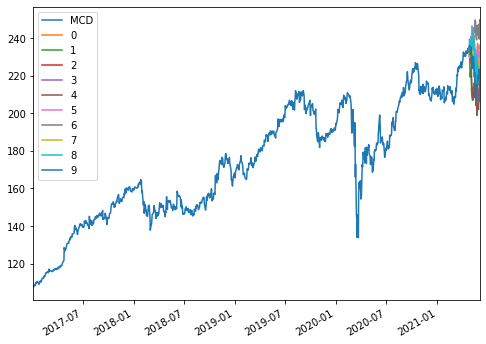

In [30]:
pd.concat([closes_mc,sim_closes]).plot(figsize=(8,6));

In [37]:
opcion_valuar['JSON']

{'contractSymbol': 'MCD210618P00250000',
 'strike': 250.0,
 'currency': 'USD',
 'lastPrice': 18.05,
 'change': -0.69000053,
 'percentChange': -3.6819665,
 'volume': 4,
 'openInterest': 85,
 'bid': 18.9,
 'ask': 19.4,
 'contractSize': 'REGULAR',
 'expiration': 1623974400,
 'lastTradeDate': 1619446398,
 'impliedVolatility': 0.22382367980957027,
 'inTheMoney': True}

In [31]:
from datetime import date
Hoy = date.today()

# strike price
K = opcion_valuar['JSON']['strike']  

# Fechas a simular
dates = pd.date_range(start= Hoy, periods = ndays, freq='B')

# Escenarios y número de días
ndays = len(dates)
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_mc.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

### PRIMA

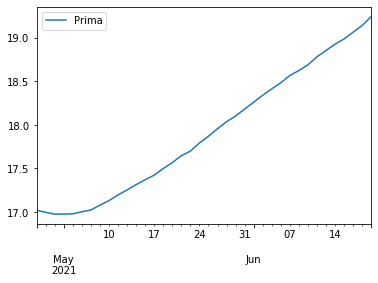

In [35]:
#prima

# Frame con el valor del strike
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)

# Valor del call europeo
put= pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

In [36]:
put.iloc[-1]

Prima    19.245448
Name: 2021-06-18 00:00:00, dtype: float64

### Intervalo de confianza del 99%

In [38]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(19.06648625380012, 19.424410708982776)


##  Técnicas de reducción de varianza

### PRIMA

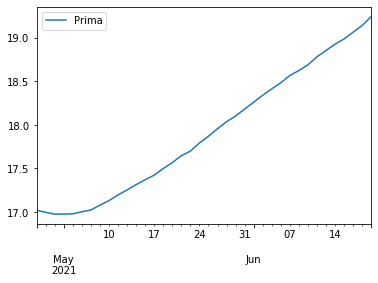

In [39]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [40]:
put.iloc[-1]

Prima    19.245448
Name: 2021-06-18 00:00:00, dtype: float64

### Intervalo de confianza del 99%

In [41]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(19.06648625380012, 19.424410708982776)


## Análisis de la distribución de los rendimientos

### Ajustando norm

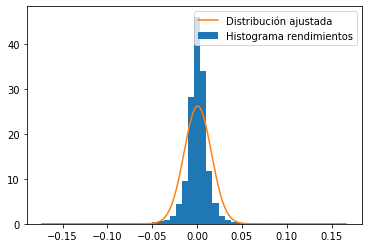

In [42]:
ren = calc_daily_ret(closes_mc) # rendimientos 
y,x,des = plt.hist(ren['MCD'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

### Ajustando t

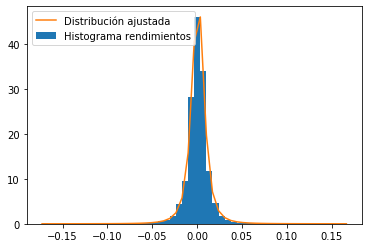

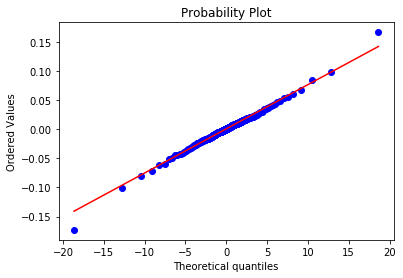

In [43]:
# rendimientos 
ren = calc_daily_ret(closes_mc) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['MCD'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()

# Q-Q
st.probplot(ren['MCD'], sparams=params[:-2], dist=dist, plot=plt);




##  Valuación usando simulación: uso del histograma de rendimientos

In [44]:
ndays = 109 
nscen = 10

In [45]:
prob = y/np.sum(y)
values = x[1:]

In [46]:
#Rendimientos simulados
ret = np.random.choice(values, ndays*nscen, p=prob)

#fechas 
dates = pd.date_range(start=Hoy,periods=ndays)

#REndimientos simulados en matriz

sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist.head()

,0,1,2,3,4,5,6,7,8,9
2021-04-28,0.003642,0.010431,0.003642,0.010431,0.010431,-0.003147,-0.003147,0.010431,-0.016725,0.003642
2021-04-29,0.010431,0.010431,-0.016725,0.003642,0.010431,-0.023514,0.003642,0.010431,0.010431,0.010431
2021-04-30,0.017220,-0.003147,0.003642,0.003642,0.010431,0.003642,0.003642,-0.023514,-0.043880,0.010431
2021-05-01,0.017220,-0.003147,0.024009,0.003642,0.017220,0.030798,0.024009,0.010431,0.010431,0.017220
2021-05-02,-0.050669,0.003642,-0.050669,0.003642,-0.023514,0.003642,0.010431,-0.003147,0.037587,0.010431


In [47]:
sim_closes_hist = (closes_mc.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist.head()

,0,1,2,3,4,5,6,7,8,9
2021-04-28,233.799990,235.392647,233.799990,235.392647,235.392647,232.218108,232.218108,235.392647,229.086382,233.799990
2021-04-29,236.251553,237.860910,229.922277,236.251553,237.860910,226.821512,233.065431,237.860910,231.488519,236.251553
2021-04-30,240.355055,237.113592,230.761222,237.113592,240.355055,227.649143,233.915845,232.333179,221.550330,238.728822
2021-05-01,244.529832,236.368623,236.368623,237.978778,244.529832,234.769362,239.599901,234.769362,223.873446,242.875353
2021-05-02,232.448307,237.231089,224.690320,238.847119,238.847119,235.625993,242.112280,234.031757,232.448307,245.422077


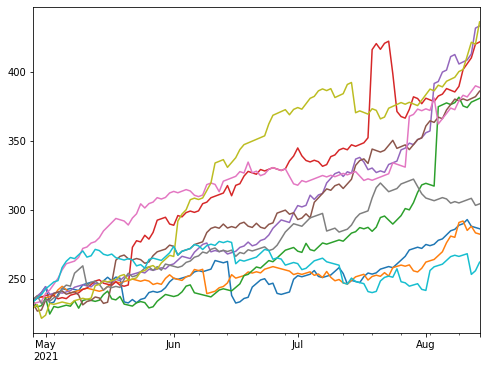

In [48]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

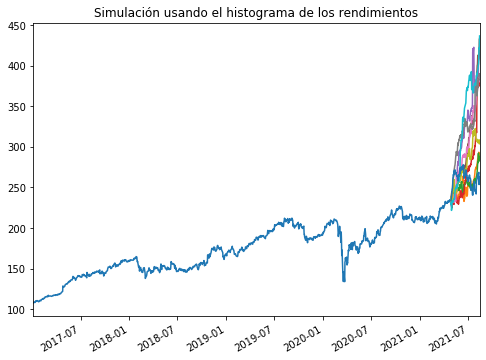

In [49]:
pd.concat([closes_mc,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')


### PRIMA

In [50]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 10000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_mc+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_mc.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

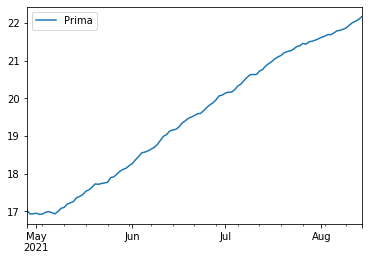

In [51]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [52]:
put_hist.iloc[-1]

Prima    22.166623
Name: 2021-08-14 00:00:00, dtype: float64

### Intervalo de confianza del 95%

In [54]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(21.40370763312131, 22.9295378758849)
(21.40370763312131, 22.9295378758849)


### `Respuesta Juan Pablo`

In [2]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

### `Elección del activo:` _Disney_

Obtengo el precio de cierre de Disney de 2018 hasta la fecha.

In [3]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [4]:
ticker = ['DIS']
start_date = '2018-01-01'

closes_dis = get_adj_closes(ticker,start_date)
closes_dis.head()

Symbols,DIS
Date,
2018-01-02,108.726
2018-01-03,109.193
2018-01-04,109.144
2018-01-05,108.551
2018-01-08,106.995


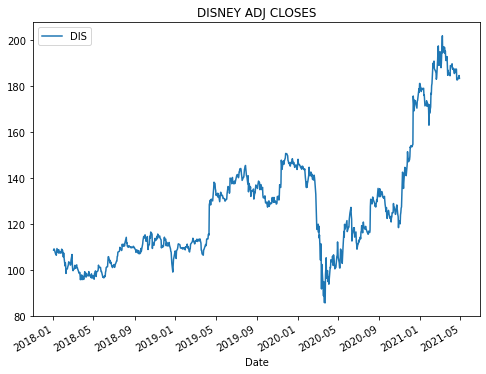

In [5]:
closes_dis.plot(figsize=[8,6])
plt.title('DISNEY ADJ CLOSES')
plt.legend(ticker)
plt.show()

Descarga de los datos de las opciones.

In [6]:
dis = web.YahooOptions('DIS')
dis_opt = dis.get_all_data().reset_index()
dis_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,177.5,call,DIS210430C00177500,...,2021-04-28 23:59:59,2021-04-28 16:11:18,"{'contractSymbol': 'DIS210430C00177500', 'stri..."
2021-04-30,217.5,put,DIS210430P00217500,...,2021-04-28 23:59:59,2021-03-16 16:38:35,"{'contractSymbol': 'DIS210430P00217500', 'stri..."
2021-04-30,220.0,call,DIS210430C00220000,...,2021-04-28 23:59:59,2021-04-28 16:21:04,"{'contractSymbol': 'DIS210430C00220000', 'stri..."
2021-04-30,220.0,put,DIS210430P00220000,...,2021-04-28 23:59:59,2021-03-15 04:01:18,"{'contractSymbol': 'DIS210430P00220000', 'stri..."
2021-04-30,195.0,call,DIS210430C00195000,...,2021-04-28 23:59:59,2021-04-28 19:58:46,"{'contractSymbol': 'DIS210430C00195000', 'stri..."
...,...,...,...,...,...,...,...
2023-01-20,80.0,put,DIS230120P00080000,...,2021-04-28 23:59:59,2021-04-15 14:58:55,"{'contractSymbol': 'DIS230120P00080000', 'stri..."
2023-01-20,130.0,put,DIS230120P00130000,...,2021-04-28 23:59:59,2021-04-28 17:37:09,"{'contractSymbol': 'DIS230120P00130000', 'stri..."
2023-01-20,230.0,put,DIS230120P00230000,...,2021-04-28 23:59:59,2021-04-21 16:41:58,"{'contractSymbol': 'DIS230120P00230000', 'stri..."


In [7]:
K = 130
indice_opt = dis_opt.loc[(dis_opt.Type=='put') & (dis_opt.Strike==K) & (dis_opt.Expiry=='2023-01-20')]
indice_opt


,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
224,130.0,2023-01-20,put,...,2021-04-28 23:59:59,2021-04-28 17:37:09,"{'contractSymbol': 'DIS230120P00130000', 'stri..."


In [8]:
i_opt = indice_opt.index
opcion_valuar = dis_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'DIS230120P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 6.7,
 'change': 0.19999981,
 'percentChange': 3.07692,
 'volume': 1,
 'openInterest': 5528,
 'bid': 5.9,
 'ask': 6.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619631429,
 'impliedVolatility': 0.3079292840576171,
 'inTheMoney': False}

In [9]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  183.66


### `Simulación usando Rendimiento Simple`

>Suponemos que los rendimientos $r\sim N(\mu,\sigma_{2})$ 

In [10]:
ret = closes_dis.pct_change().iloc[1:]
ret

Symbols,DIS
Date,
2018-01-03,4.293e-03
2018-01-04,-4.452e-04
2018-01-05,-5.435e-03
2018-01-08,-1.433e-02
2018-01-09,-7.272e-04
...,...
2021-04-22,-1.911e-03
2021-04-23,1.423e-03
2021-04-26,6.830e-03


### `Visualización de los rendimientos logaritmicos`

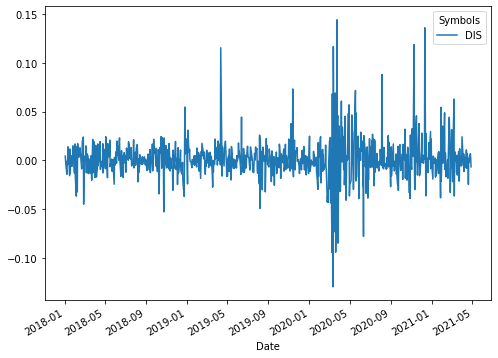

In [11]:
ret.plot(figsize=[8,6]);

>Obtengo la media y su desviación estándar.

In [12]:
mu = ret.mean()[0]
sigma = ret.std()[0]

mu,sigma

(0.0008394612471699439, 0.020768673274046856)

>Obtengo un rango de fechas

In [13]:
from datetime import date

today = pd.to_datetime(date.today())
expiry = opcion_valuar.Expiry

ndays = (expiry-today).days
nscen = 10000
dates = pd.date_range(start=today, periods = ndays)
ndays 

632

In [14]:
expiry

Timestamp('2023-01-20 00:00:00')

In [15]:
dates

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07',
               ...
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19'],
              dtype='datetime64[ns]', length=632, freq='D')

### `Simulación utilizando rendimiento simple`

In [16]:
# Para que sea diario 
dt = 1

Z = np.random.randn(ndays,nscen)

#Simulación de los rendimientos
ret_dt = pd.DataFrame(Z*sigma*np.sqrt(dt)+mu*dt,index=dates)
ret_dt

,0,1,2,...,9997,9998,9999
2021-04-28,0.002,0.015,-0.011,...,0.038,0.001,1.521e-02
2021-04-29,0.031,-0.006,0.009,...,0.020,0.007,2.187e-02
2021-04-30,0.011,-0.035,-0.035,...,0.005,-0.007,-2.052e-02
2021-05-01,0.011,0.014,0.029,...,0.002,0.023,-1.167e-02
2021-05-02,-0.012,0.006,-0.011,...,-0.013,0.005,1.992e-02
...,...,...,...,...,...,...,...
2023-01-15,0.021,-0.002,-0.068,...,-0.017,-0.006,-2.682e-03
2023-01-16,-0.018,-0.014,0.023,...,0.007,-0.020,4.221e-03
2023-01-17,-0.019,-0.003,0.010,...,-0.010,-0.049,3.327e-04
2023-01-18,-0.005,0.016,-0.002,...,0.029,-0.003,-1.034e-02


In [17]:
S0 = opcion_valuar.Underlying_Price
np.cumprod(ret_dt+1)

,0,1,2,...,9997,9998,9999
2021-04-28,1.002,1.015,0.989,...,1.038,1.001,1.015
2021-04-29,1.033,1.009,0.998,...,1.059,1.008,1.037
2021-04-30,1.044,0.974,0.964,...,1.064,1.001,1.016
2021-05-01,1.056,0.987,0.992,...,1.067,1.024,1.004
2021-05-02,1.044,0.993,0.981,...,1.053,1.029,1.024
...,...,...,...,...,...,...,...
2023-01-15,0.563,2.952,1.970,...,1.532,0.771,0.543
2023-01-16,0.552,2.910,2.015,...,1.542,0.756,0.545
2023-01-17,0.542,2.901,2.035,...,1.527,0.719,0.545
2023-01-18,0.539,2.946,2.031,...,1.572,0.717,0.540


In [18]:
# Simulando el precio
S_0 = closes_dis.iloc[-1,0]
S_T = S_0*(1+ret_dt).cumprod()

Vizualisación de los precios simulados junto con los precios descargados

Text(0.5, 1.0, 'Simulación de precios usando rendimiento simple')

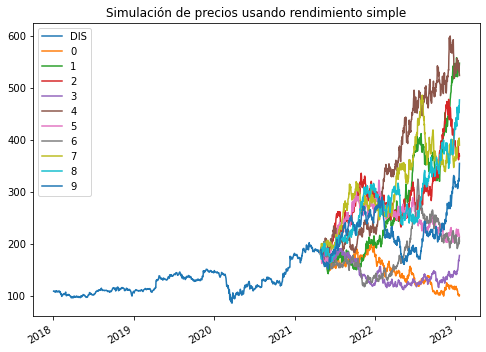

In [19]:
pd.concat([closes_dis,S_T.iloc[:,:10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple')

### `Simulación usando Rendimiento Logaritmico`

In [20]:
# función que obtiene los redimientos logaritmicos
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [21]:
r_log = calc_daily_ret(closes_dis)
r_log

Symbols,DIS
Date,
2018-01-03,4.284e-03
2018-01-04,-4.453e-04
2018-01-05,-5.450e-03
2018-01-08,-1.444e-02
2018-01-09,-7.274e-04
...,...
2021-04-22,-1.913e-03
2021-04-23,1.422e-03
2021-04-26,6.807e-03


### `Visualización de los rendimientos logaritmicos`

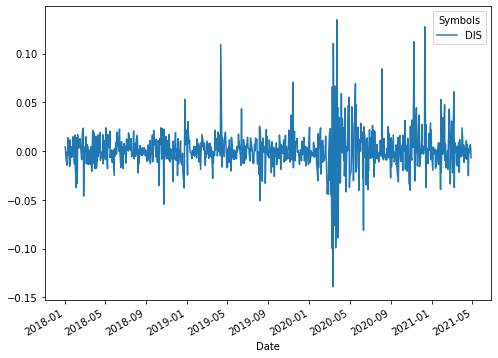

In [22]:
r_log.plot(figsize=[8,6]);

>Media y desviación estándar de los rendimientos logaritmicos

In [23]:
mu_r = r_log.mean()[0]
sigma_r = r_log.std()[0]

mu_r, sigma_r

(0.0006260879772115214, 0.020613204082094775)

In [24]:
# simulación del rendimiento
Z = np.random.randn(ndays,nscen)
sim_ret_log = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt),index=dates)
sim_ret_log

,0,1,2,...,9997,9998,9999
2021-04-28,0.039,-0.034,-2.832e-02,...,-0.016,-4.669e-04,0.022
2021-04-29,-0.018,-0.016,-2.963e-02,...,0.031,2.744e-03,0.002
2021-04-30,0.021,-0.015,8.534e-03,...,-0.003,1.889e-02,0.001
2021-05-01,-0.005,0.007,8.150e-03,...,0.026,3.198e-02,0.001
2021-05-02,0.042,0.008,3.028e-03,...,-0.008,-1.081e-02,0.006
...,...,...,...,...,...,...,...
2023-01-15,-0.060,-0.040,5.781e-02,...,-0.012,1.619e-02,-0.022
2023-01-16,0.030,0.006,-9.942e-03,...,0.011,1.575e-03,0.005
2023-01-17,0.007,0.013,1.258e-02,...,-0.003,-1.082e-02,-0.006
2023-01-18,-0.006,0.015,8.812e-03,...,-0.063,2.233e-02,0.010


In [25]:
# simulación del precio
S_0 = closes_dis.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_log.cumsum())
S_T2.iloc[0,:]=S_0
S_T2

,0,1,2,...,9997,9998,9999
2021-04-28,183.390,183.390,183.390,...,183.390,183.390,183.390
2021-04-29,187.185,174.535,173.064,...,186.154,183.808,187.848
2021-04-30,191.220,171.931,174.547,...,185.616,187.314,188.075
2021-05-01,190.174,173.080,175.975,...,190.545,193.400,188.297
2021-05-02,198.237,174.451,176.509,...,188.949,191.320,189.442
...,...,...,...,...,...,...,...
2023-01-15,1024.879,528.324,149.861,...,354.505,439.487,128.843
2023-01-16,1055.680,531.347,148.379,...,358.286,440.180,129.532
2023-01-17,1063.367,538.539,150.258,...,357.300,435.444,128.768
2023-01-18,1057.127,546.538,151.587,...,335.360,445.279,130.058


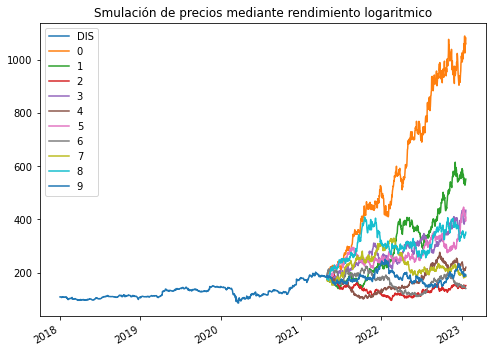

In [26]:
# precios simulados con los precios descargados
pd.concat([closes_dis,S_T2.iloc[:,:10]]).plot(figsize=[8,6])
plt.title('Smulación de precios mediante rendimiento logaritmico')
plt.show()

In [27]:
error = np.abs(S_T-S_T2).mean().mean()
print('error absoluto entre precios simulados con rendimiento simple y logaritmico',error)

error absoluto entre precios simulados con rendimiento simple y logaritmico 99.0460656485542


Encontar el valor de la opción según su función de pago en este caso para una put es la siguiente:

$$ max(K-S_T,0)$$

### `Valuación usando el modelo de Black & Scholes`

Ya que estamos en un mundo neutral al riesgo ( a un año) tomamos la tasa libre de riesgo y no la media.

La tomo de:  https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [28]:
r = (0.06/100)/360

Simulo el tiempo de contato desde HOY hasta la fecha de Expiración con 1000 escenarios.

In [29]:
nscen = 10000
sim_ret = pd.DataFrame(sigma_r*np.random.randn(ndays,nscen)+r,index=dates)
sim_ret.cumsum()

,0,1,2,...,9997,9998,9999
2021-04-28,0.004,-0.009,-0.014,...,0.015,-1.195e-02,-3.513e-02
2021-04-29,0.034,-0.026,-0.035,...,0.025,-1.527e-02,-1.838e-02
2021-04-30,0.042,0.004,-0.097,...,0.044,-3.052e-02,6.795e-04
2021-05-01,0.058,0.010,-0.100,...,0.058,-3.000e-02,2.157e-03
2021-05-02,0.059,-0.012,-0.064,...,0.090,1.724e-02,-3.871e-03
...,...,...,...,...,...,...,...
2023-01-15,-0.381,0.598,-0.390,...,-0.087,1.703e-02,3.022e-01
2023-01-16,-0.378,0.565,-0.384,...,-0.110,-4.216e-04,3.184e-01
2023-01-17,-0.380,0.545,-0.359,...,-0.083,1.341e-02,3.348e-01
2023-01-18,-0.383,0.520,-0.356,...,-0.126,-5.783e-03,3.282e-01


Despúes de simular los rendimientos, calculo los escenarios de precios.

In [30]:
S0 = closes_dis.iloc[-1,0]
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0,:]
sim_closes

,0,1,2,...,9997,9998,9999
2021-04-28,184.122,181.764,180.752,...,186.196,181.212,177.059
2021-04-29,189.740,178.729,177.153,...,188.088,180.611,180.050
2021-04-30,191.273,184.205,166.417,...,191.720,177.877,183.515
2021-05-01,194.401,185.176,165.873,...,194.280,177.971,183.786
2021-05-02,194.459,181.255,172.037,...,200.709,186.579,182.682
...,...,...,...,...,...,...,...
2023-01-15,125.286,333.455,124.202,...,168.164,186.539,248.085
2023-01-16,125.713,322.683,124.906,...,164.279,183.313,252.158
2023-01-17,125.388,316.333,128.012,...,168.838,185.865,256.327
2023-01-18,125.041,308.549,128.474,...,161.689,182.333,254.619


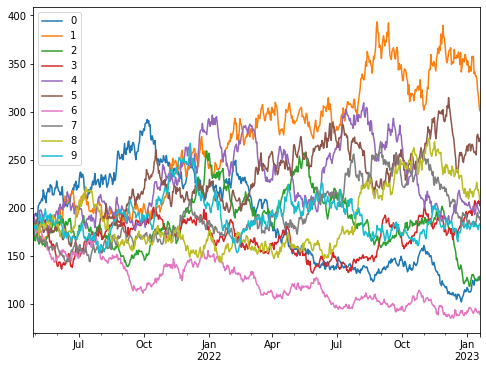

In [31]:
sim_closes.iloc[:,:10].plot(figsize=(8,6)); # solo grafico 10 

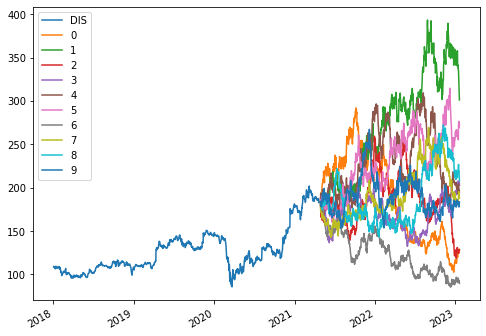

In [32]:
# precios simulados 

pd.concat([closes_dis,sim_closes.iloc[:,:10]]).plot(figsize=(8,6));

Obtengo la volatilidad implicita de los datos de la opción

In [33]:
opcion_valuar['JSON']

{'contractSymbol': 'DIS230120P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 6.7,
 'change': 0.19999981,
 'percentChange': 3.07692,
 'volume': 1,
 'openInterest': 5528,
 'bid': 5.9,
 'ask': 6.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619631429,
 'impliedVolatility': 0.3079292840576171,
 'inTheMoney': False}

In [34]:
sigma = 0.3076851458740234/np.sqrt(252)
sigma

0.019382342335507077

In [35]:
S0 = closes_dis.iloc[-1,0]

K = opcion_valuar['JSON']['strike']

ndays = len(dates)
nscen = 10000

# simulo rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# simulo precios
sim_closes = S0*np.exp(sim_ret.cumsum())

In [36]:
sim_closes.head()

,0,1,2,...,9997,9998,9999
2021-04-28,184.546,178.463,181.107,...,183.914,183.369,182.025
2021-04-29,181.353,176.599,184.562,...,181.962,186.545,178.864
2021-04-30,179.516,176.660,184.736,...,183.534,183.454,176.628
2021-05-01,180.215,177.226,179.120,...,181.488,193.075,176.795
2021-05-02,183.753,183.391,175.662,...,181.139,185.045,178.926


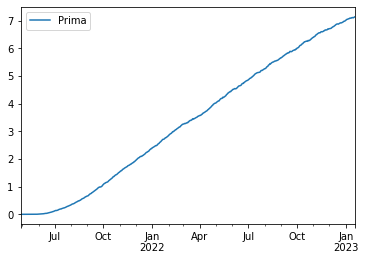

In [37]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)

# valor del pull europeo de disney
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                    *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)},index=dates)

put.plot();

La valuación de la opcíón es:

In [38]:
put.iloc[-1]

Prima    7.146
Name: 2023-01-19 00:00:00, dtype: float64

### `Simulación de precios usando técnicas de reducción de varianza`

(_muestreo estratificado_)

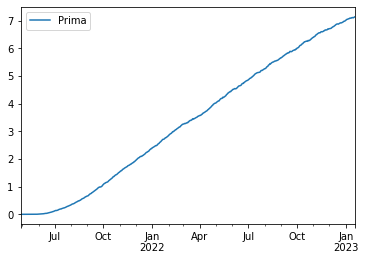

In [39]:
nscen = 10000
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

La valuación de la opcíón es:

In [40]:
put.iloc[-1]

Prima    7.146
Name: 2023-01-19 00:00:00, dtype: float64

**Intervalo de confianza del 99%**

In [41]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza,loc=mean_est, scale = sigma_est)
print('intervalo de confianza al 99%',i2)

intervalo de confianza al 99% (4.397724952004923, 9.89329875000755)


**Análisis de la distribución de rendimientos**

## **Ajustando una distribución normal**

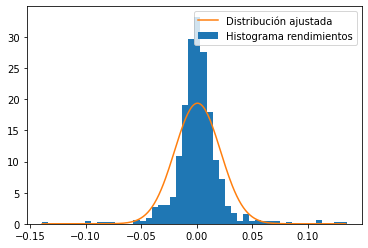

In [42]:
ren = calc_daily_ret(closes_dis) # rendimientos 

#Histograma
y,x,des = plt.hist(ren['DIS'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal

# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)

# Vector de rendimientos 
ren_gen = np.arange(ren_min,ren_max,0.001)



# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

## **Ajustando una distribución t**

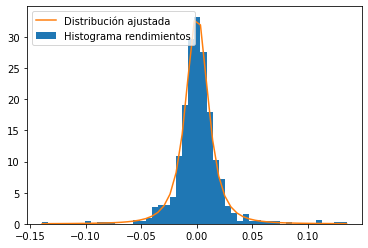

In [43]:
# rendimientos 
ren = calc_daily_ret(closes_dis) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['DIS'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()



## Grafica QQ

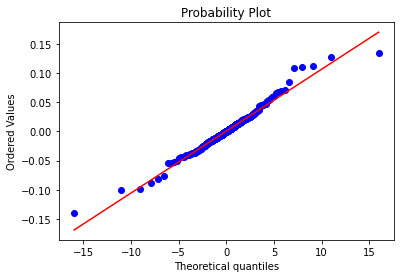

In [44]:
# Q-Q
st.probplot(ren['DIS'], sparams=params[:-2], dist=dist, plot=plt);

En la gráfica QQ se puede observar que la distribución tiene una alta kurtosis ya que muchos datos se encuentran cerca de la media y también tiene colas muy pesadas.

### `Valuación usando simulación: uso del histograma de rendimientos`

Definiendo número de escenarios y días para la matriz

In [45]:
nscen = 10

In [46]:
ndays,nscen

(632, 10)

Definiedo la probabilidad con los valores ya conocidos de y provenientes del histograma
así como los rendimientos que están en _x_.

In [47]:
prob = y/np.sum(y)
values = x[1:]

In [48]:
# comprobamos que en efecto la suma de las prob es igual a 1
prob.sum()

0.9999999999999998

Rendimientos simulados

In [49]:

ret = np.random.choice(values, ndays*nscen, p=prob)
#fechas
dates = pd.date_range(start=today,periods=ndays)


sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2021-04-28,-0.013,0.014,0.003,...,0.003,0.009,0.063
2021-04-29,0.014,-0.008,-0.019,...,-0.002,0.009,0.003
2021-04-30,0.003,0.014,-0.002,...,-0.002,-0.002,-0.008
2021-05-01,-0.013,-0.002,0.014,...,0.003,0.009,0.014
2021-05-02,0.009,0.025,-0.008,...,-0.024,-0.008,0.003
...,...,...,...,...,...,...,...
2023-01-15,0.003,0.003,-0.008,...,0.003,-0.019,-0.008
2023-01-16,-0.035,0.025,0.058,...,-0.035,0.014,0.025
2023-01-17,0.020,-0.008,0.003,...,-0.030,-0.008,-0.002
2023-01-18,-0.035,0.003,0.025,...,0.003,-0.002,-0.002


In [50]:
sim_closes_hist = (closes_dis.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2021-04-28,180.990,186.013,183.987,...,183.987,184.997,195.407
2021-04-29,183.579,184.586,180.588,...,183.579,186.619,196.044
2021-04-30,184.177,187.226,180.187,...,183.171,186.204,194.540
2021-05-01,181.767,186.811,182.764,...,183.768,187.836,197.323
2021-05-02,183.360,191.568,181.363,...,179.388,186.396,197.965
...,...,...,...,...,...,...,...
2023-01-15,1909.541,1051.425,2351.121,...,1110.590,1239.094,1847.837
2023-01-16,1843.734,1078.203,2491.509,...,1072.317,1256.815,1894.899
2023-01-17,1880.369,1069.935,2499.623,...,1041.046,1247.178,1890.691
2023-01-18,1815.567,1073.420,2563.284,...,1044.436,1244.408,1886.493


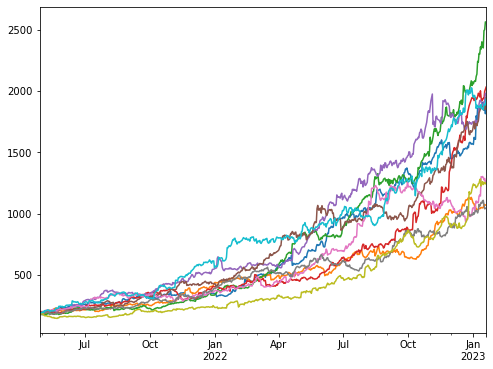

In [51]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

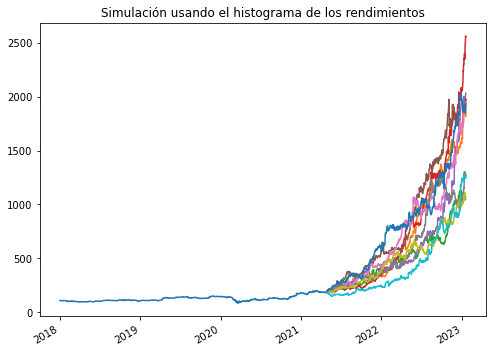

In [52]:
pd.concat([closes_dis,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [53]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 10000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(r_log+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_dis.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

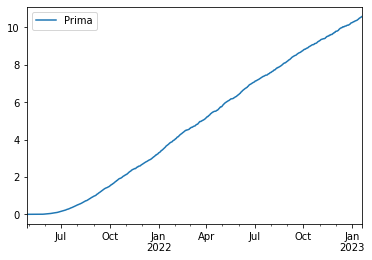

In [54]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();


El valor de la opción es de:

In [55]:
put_hist.iloc[-1]

Prima    10.581
Name: 2023-01-19 00:00:00, dtype: float64

In [56]:
opcion_valuar['JSON']

{'contractSymbol': 'DIS230120P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 6.7,
 'change': 0.19999981,
 'percentChange': 3.07692,
 'volume': 1,
 'openInterest': 5528,
 'bid': 5.9,
 'ask': 6.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619631429,
 'impliedVolatility': 0.3079292840576171,
 'inTheMoney': False}

In [57]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print('intervalo de confianza de la distribución t',i1)
print('Intervalo de la distribución normal',i2)

intervalo de confianza de la distribución t (8.514609721541476, 12.64688991542982)
Intervalo de la distribución normal (8.514859824341196, 12.6466398126301)
